## Compression Evaluation

In [9]:
import os
import time
import lzma
import heapq
from collections import defaultdict
import matplotlib.pyplot as plt
from compressor.huffman import huffman_compress, huffman_decompress
from compressor.arithmetic import arithmetic_compress, arithmetic_decompress
from compressor.bwt import bwt_compress, bwt_decompress
from compressor.lzw import lzw_compress, lzw_decompress


def get_folder_size(folder_path='.'):
		total = 0
		with os.scandir(folder_path) as it:
				for entry in it:
						if entry.is_file():
								total += entry.stat().st_size
						elif entry.is_dir():
								total += get_folder_size(entry.path)
		return total

def evaluate_compression_performance(data_folder, skip_algorithms=[]):
		total_original_size = get_folder_size(data_folder)

		compression_algorithms = [
				"huffman", "lzw", "bwt", "arithmetic"
		]
		compression_ratios = []
		compression_times = []
		used_algorithms = []

		for algorithm in compression_algorithms:
				if algorithm in skip_algorithms:
						continue
		
				start_time = time.time()
				compressed_folder = f"compressed/{algorithm}"

				if algorithm == "huffman":
						huffman_compress(data_folder, compressed_folder)
				elif algorithm == "lzw":
						lzw_compress(data_folder, compressed_folder)
				elif algorithm == "bwt":
						bwt_compress(data_folder, compressed_folder)
				elif algorithm == "arithmetic":
						arithmetic_compress(data_folder, compressed_folder)

				total_compressed_size = get_folder_size(compressed_folder)

				compression_ratio = total_original_size / total_compressed_size
				compression_time = time.time() - start_time

				compression_ratios.append(compression_ratio)
				compression_times.append(compression_time)
				used_algorithms.append(algorithm)

				print(f"Compression Algorithm: {algorithm}")
				print(f"Compression Ratio: {compression_ratio:.2f}")
				print(f"Compression Time: {compression_time:.4f} seconds")
				print()

		return used_algorithms, compression_ratios, compression_times

def visualize_metrics(algorithms, ratios, times):
		"""Visualize compression metrics using matplotlib."""
		plt.figure(figsize=(10, 5))

		# Plot Compression Ratios
		plt.subplot(1, 2, 1)
		plt.bar(algorithms, ratios, color='skyblue')
		plt.xlabel('Compression Algorithm')
		plt.ylabel('Compression Ratio')
		plt.title('Compression Ratio Comparison')

		# Plot Compression Times
		plt.subplot(1, 2, 2)
		plt.bar(algorithms, times, color='salmon')
		plt.xlabel('Compression Algorithm')
		plt.ylabel('Compression Time (seconds)')
		plt.title('Compression Time Comparison')

		plt.tight_layout()
		plt.show()



Compressing file: data\10.txt -> compressed/huffman\10.bin
File compressed successfully: data\10.txt -> compressed/huffman\10.bin
Compressing file: data\101.txt -> compressed/huffman\101.bin
File compressed successfully: data\101.txt -> compressed/huffman\101.bin
Compressing file: data\102.txt -> compressed/huffman\102.bin
File compressed successfully: data\102.txt -> compressed/huffman\102.bin
Compressing file: data\103.txt -> compressed/huffman\103.bin
File compressed successfully: data\103.txt -> compressed/huffman\103.bin
Compressing file: data\104.txt -> compressed/huffman\104.bin
File compressed successfully: data\104.txt -> compressed/huffman\104.bin
Compressing file: data\105.txt -> compressed/huffman\105.bin
File compressed successfully: data\105.txt -> compressed/huffman\105.bin
Compressing file: data\106.txt -> compressed/huffman\106.bin
File compressed successfully: data\106.txt -> compressed/huffman\106.bin
Compressing file: data\107.txt -> compressed/huffman\107.bin
File 

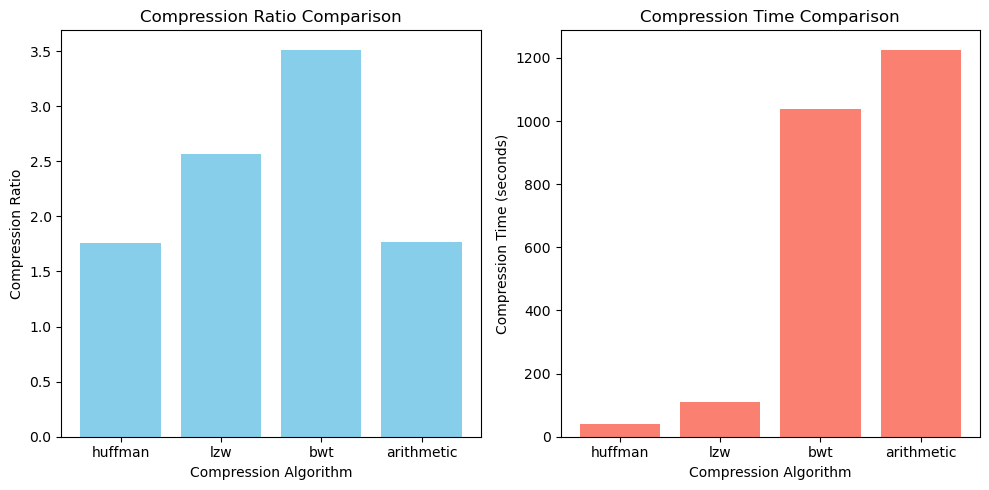

In [11]:
data_folder_path = "data"  # Path to folder containing text files

	# Evaluate compression performance
algorithms, ratios, times = evaluate_compression_performance(data_folder_path)

# Visualize compression metrics
visualize_metrics(algorithms, ratios, times)

In [18]:
space_savings = [1 - 1/ratio*100 for ratio in ratios]
space_savings

[-56.00828285468821,
 -37.943308754681574,
 -27.460802784716442,
 -55.657864632746744]

## Decompression Evaluation

In [16]:
import os
import time
import lzma
import heapq
from collections import defaultdict
import matplotlib.pyplot as plt
from compressor.huffman import huffman_compress, huffman_decompress
from compressor.arithmetic import arithmetic_compress, arithmetic_decompress
from compressor.bwt import bwt_compress, bwt_decompress
from compressor.lzw import lzw_compress, lzw_decompress


def get_folder_size(folder_path='.'):
		total = 0
		with os.scandir(folder_path) as it:
				for entry in it:
						if entry.is_file():
								total += entry.stat().st_size
						elif entry.is_dir():
								total += get_folder_size(entry.path)
		return total

def evaluate_decompression_performance(data_folder, skip_algorithms=[]):
		total_original_size = get_folder_size(data_folder)
		
		compression_algorithms = [
				"huffman", "lzw", "bwt", "arithmetic"
		]
		compression_times = []
		used_algorithms = []

		for algorithm in compression_algorithms:
				if algorithm in skip_algorithms:
						continue
				
				compressed_folder = f"compressed/{algorithm}"
				decompressed_folder = f"decompressed/{algorithm}"
		
				start_time = time.time()

				if algorithm == "huffman":
						huffman_decompress(compressed_folder, decompressed_folder)
				elif algorithm == "lzw":
						lzw_decompress(compressed_folder, decompressed_folder)
				elif algorithm == "bwt":
						bwt_decompress(compressed_folder, decompressed_folder)
				elif algorithm == "arithmetic":
						arithmetic_decompress(compressed_folder, decompressed_folder)

				total_decompressed_size = get_folder_size(decompressed_folder)

				decompression_ratio = total_original_size / total_decompressed_size

				compression_time = time.time() - start_time

				compression_times.append(compression_time)
				used_algorithms.append(algorithm)

				print(f"Deompression Algorithm: {algorithm}")
				print(f"Deompression ratio: {decompression_ratio}")
				print(f"Decompression Time: {compression_time:.4f} seconds")
				print()

		return used_algorithms, compression_times

def decompression_visualize_metrics(algorithms, times):
		"""Visualize compression metrics using matplotlib."""
		plt.figure(figsize=(10, 5))
  
		# Plot Compression Times
		plt.subplot(1, 2, 2)
		plt.bar(algorithms, times, color='salmon')
		plt.xlabel('Decompression Algorithm')
		plt.ylabel('Decompression Time (seconds)')
		plt.title('Decompression Time Comparison')

		plt.tight_layout()
		plt.show()



Decompressing file: compressed/huffman\10.bin -> decompressed/huffman\10.txt
File decompressed successfully: compressed/huffman\10.bin -> decompressed/huffman\10.txt
Decompressing file: compressed/huffman\101.bin -> decompressed/huffman\101.txt
File decompressed successfully: compressed/huffman\101.bin -> decompressed/huffman\101.txt
Decompressing file: compressed/huffman\102.bin -> decompressed/huffman\102.txt
File decompressed successfully: compressed/huffman\102.bin -> decompressed/huffman\102.txt
Decompressing file: compressed/huffman\103.bin -> decompressed/huffman\103.txt
File decompressed successfully: compressed/huffman\103.bin -> decompressed/huffman\103.txt
Decompressing file: compressed/huffman\104.bin -> decompressed/huffman\104.txt
File decompressed successfully: compressed/huffman\104.bin -> decompressed/huffman\104.txt
Decompressing file: compressed/huffman\105.bin -> decompressed/huffman\105.txt
File decompressed successfully: compressed/huffman\105.bin -> decompressed/

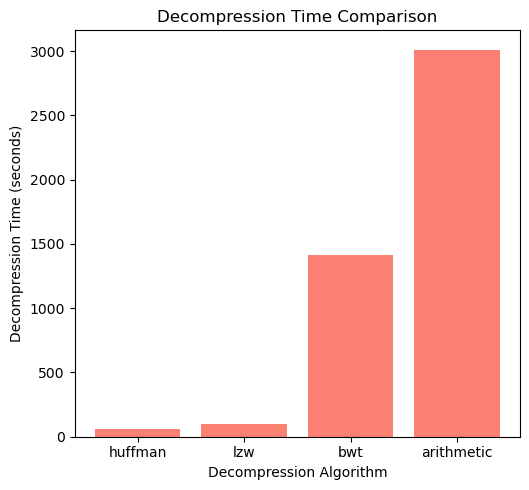

In [17]:
data_folder_path = "data"  # Path to folder containing text files

	# Evaluate compression performance
algorithms, times = evaluate_decompression_performance(data_folder_path)

# Visualize compression metrics
decompression_visualize_metrics(algorithms, times)